<a href="https://colab.research.google.com/github/JoshuaBarsky/Math-152/blob/main/Classwork_3_9_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import Image

Order. Chaos.

Determinism.  Unpredictability.

Individuals.  Collective.

..Iteration.

**Complex Number**

$\mathbb{C}$ = $\mathbb{R}$ + $\mathbb{R}j$

In [ ]:
z = 1+2j
z*z

(-3+4j)

**Test bounded graph**

In [ ]:
def stay_bounded(c):
  for i in range(1000):
    c = (c**2)+c
    if c > 10:
      return False
    else:
      continue
  return True

In [ ]:
print(stay_bounded(.001))

True


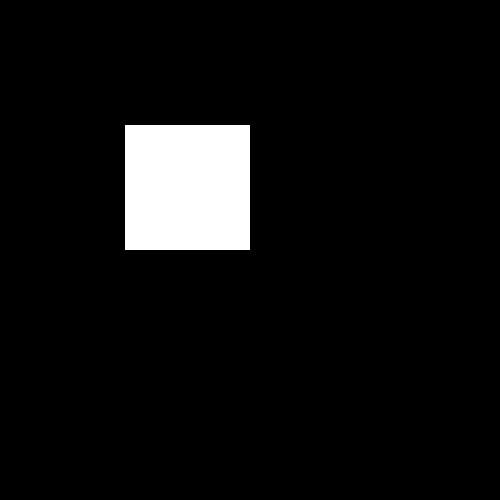

In [ ]:
x = np.linspace(-2,2, 500)
y = np.linspace(-2,2, 500)
bool_x = x
bool_y = y
for i in range(x.size):
  bool_x[i] = stay_bounded(x[i])
for i in range(y.size):
  bool_y[i] = stay_bounded(y[i])

bool_xy = np.multiply.outer(bool_x, bool_y)
m = np.array(bool_xy, dtype=bool)

b_img = Image.fromarray(m)
display(b_img)

####**Code for Mandelbrot set**

In [ ]:
re_array = np.linspace(-2,2,400)
im_array = np.linspace(-1,1,200)

c_array = np.add.outer(re_array, im_array*1j)

In [ ]:
def make_mandel(num_iter=100):
  arr = np.zeros(c_array.shape) #keeps track of numbers
  b_arr = np.zeros(c_array.shape) #keeps track of boundedness
  for t in range(num_iter):
    arr = (arr**2)+c_array #complex numbers
    arr_size = np.abs(arr) #floats
    is_bded = (arr_size < 2) #boolean
    b_arr = b_arr + is_bded
    arr = (arr * is_bded) + (2*(1-is_bded))
  return is_bded

$f$: x ↦ x if |x|$\le$2, 2 if |x|$>$2 

In [ ]:
mbrot = make_mandel()


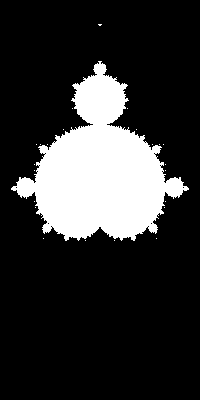

In [ ]:
img = Image.fromarray(mbrot)
display(img)

In [ ]:
def make_mandel2(num_iter=100):
  arr = np.zeros(c_array.shape) #keeps track of numbers
  b_arr = np.zeros(c_array.shape) #keeps track of boundedness
  for t in range(num_iter): #loop must be used for this type of dynamical approach
    arr = (arr**2)+c_array #complex numbers
    arr_size = np.abs(arr) #floats
    is_bded = (arr_size < 2) #boolean
    b_arr = b_arr + is_bded
    arr = (arr * is_bded) + (2*(1-is_bded))
  return b_arr, is_bded


In [ ]:
esc_time, mbrot = make_mandel2()

In [ ]:
pixels = np.zeros((c_array.shape[0], c_array.shape[1], 3))

In [ ]:
pixels[:,:,0] = mbrot*255
pixels[:,:,1] = mbrot*255
pixels[:,:,2] = mbrot*255
pixels[:,:,0] += (100*esc_time%255)
pixels[:,:,1] += (37*esc_time%255)
pixels = np.clip(pixels,0,255)

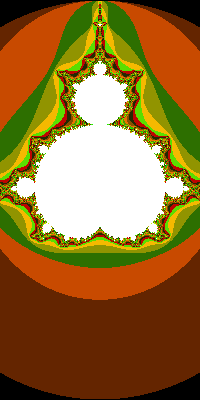

In [ ]:
im = Image.fromarray(pixels.astype(np.uint8))
display(im)

Newton's Method brings cool fractals as well.

###**Random walks**

In [ ]:
num_bots = 100000
bots = np.zeros((num_bots, 2))
bots[0] #location of bots

array([0., 0.])

In [ ]:
for t in range(1000):
  step = np.random.uniform(-1,1,(num_bots,2))
  bots = bots+step

In [ ]:
bots[0]

array([ 4.43595754, -7.84319547])

In [ ]:
counts = np.histogram2d(bots[:,0], bots[:,1], bins = 300)[0]

In [ ]:
cmax = np.max(counts)
pixels = (counts*255/cmax)
pixels = pixels.astype(np.uint8)

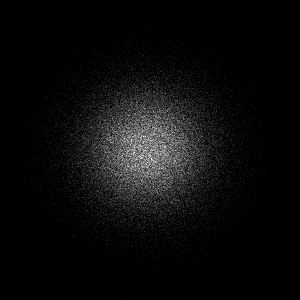

In [ ]:
img_bots = Image.fromarray(pixels)
display(img_bots)

###**Remember for the project: break up into code blocks.**

**Logistic equation**

$z_{n+1} = rz_n(1-z_n)$

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def logistic(z, r):
  return r*z*(1-z)

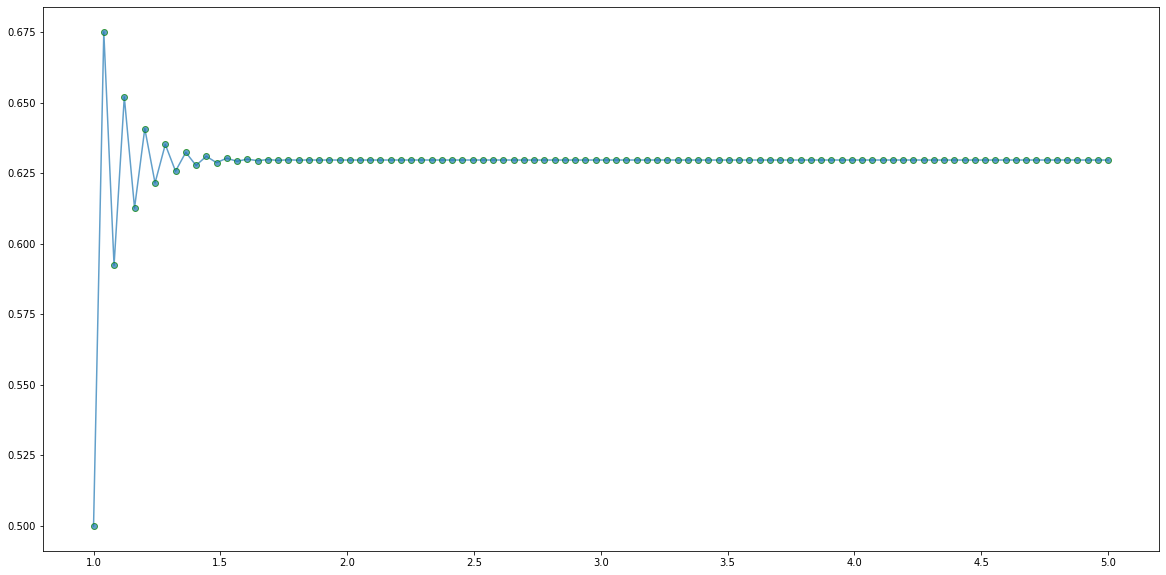

In [9]:
x = np.linspace(1,5,100)
y = np.linspace(1,5,100)

pop = .5
rate = 2.7

for i in range(y.size):
  y[i] = pop
  pop = logistic(pop,rate)

plt.figure(figsize=(20,10))
plt.plot(x,y, alpha = .7, marker='o', markeredgecolor='g')
plt.show()

**Professionally done math equations**

https://github.com/jonnyhyman/

##**Bifurcation Diagram (3/12)**

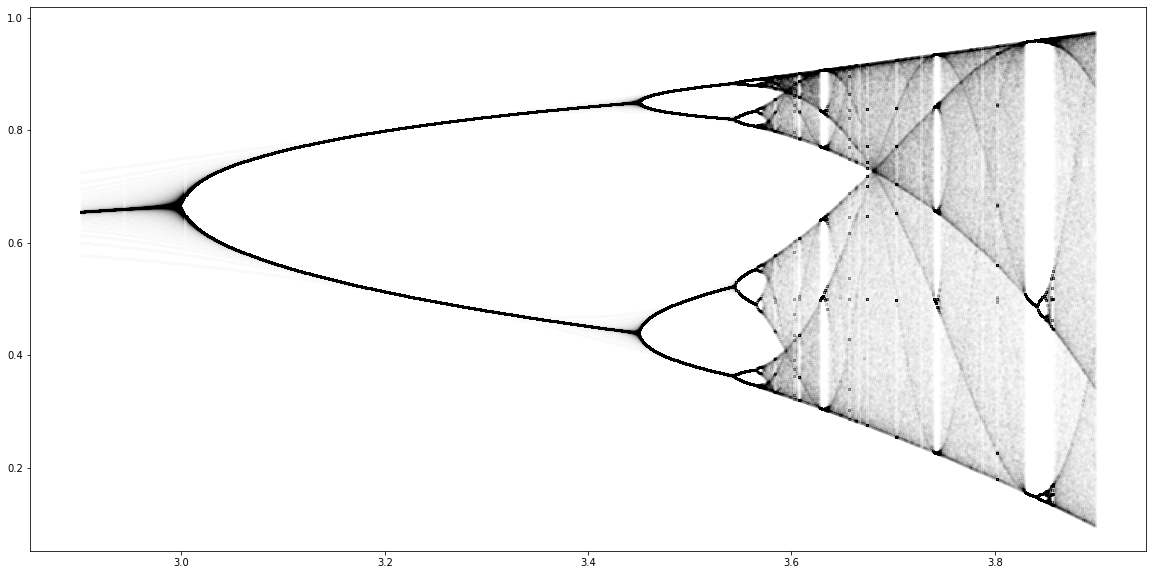

In [42]:
s = 1000 #size of data sxs

bif_x = np.linspace(1,5,s)
bif_y = np.zeros((s,s))
xarray = []
yarray = []

bif_pop = 0.5
bif_rate = 2.9

temp_pop = bif_pop
temp_rate = bif_rate

for i in range(s):  #loop that splits x values accordingly (i.e. 2.7 to 3.7 in increments of .01, for s = 100)
  bif_x[i] = temp_rate
  temp_rate = temp_rate + 1/s

temp_rate = bif_rate #readjusts rate after prev loop

for i in range(s):
  for j in range(s):
    bif_y[i,j] = temp_pop
    temp_pop = logistic(temp_pop,temp_rate)
  temp_pop = bif_pop
  temp_rate = temp_rate + 1/s

for i in range(s-1):  #creates x and y values for plotting in scatterplot
  for j in range(s-1):
    xarray.append(bif_x[i+1])
    yarray.append(bif_y[i][j+1])

#(bif_x[0],  bif_y[0][0])
#(bif_x[0],  bif_y[0][1])
#(bif_x[0],  bif_y[0][2])
#...
#(bif_x[0],  bif_y[0][99])


plt.figure(figsize=(20,10))
plt.scatter(xarray, yarray, marker='.', alpha=.005, c='k')
plt.show()